# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Wroclaw, Lower Silesia, Poland**, or **Poland** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Wroclaw, Lower Silesia, Poland** to Ann Arbor, USA. In that case at least one source file must be about **Wroclaw, Lower Silesia, Poland**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Wroclaw, Lower Silesia, Poland** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Solution

### Region and Domain

Wroclaw and Warsaw, Poland

### Research Question

Is Wroclaw warmer than Warsaw?

### Links

- data/C2A2_data/BinnedCsvs_d400/4e4e25e8f3967aca57f70198b6b574d3dec72e0cf8f84f63bf10b90a.csv (Warszawa)
- data/C2A2_data/BinnedCsvs_d400/727571c7680083a86eda6e704b48fc8fbf08e0cb6d53845079ee020d.csv (Wroclaw)

### Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_code = 'PL'

stations = pd.read_csv('data/C2A2_data/BinSize_d400.csv')
stations = stations[stations['ID'].str.startswith(country_code)]

stations['file'] = 'data/C2A2_data/BinnedCsvs_d400/'+ stations['hash'] + '.csv'
poland = stations.drop_duplicates(subset=['file']).set_index('NAME')[['ID', 'file', 'LATITUDE', 'LONGITUDE']]

poland.rename(index={'STRACHOWICE': 'WROCLAW',
                    'OKECIE': 'WARSZAWA'}, inplace=True)

poland

,ID,file,LATITUDE,LONGITUDE
NAME,,,,
LEBA,PL000012120,data/C2A2_data/BinnedCsvs_d400/b5e79cb27160825...,54.750,17.5331
SIEDLCE,PL000012385,data/C2A2_data/BinnedCsvs_d400/9030280da495420...,52.250,22.2500
ELBLAG-MILEJEWO,PLM00012160,data/C2A2_data/BinnedCsvs_d400/6f2bdfb1f519568...,54.167,19.4330
SZCZECIN,PLM00012205,data/C2A2_data/BinnedCsvs_d400/e8a2f99e465206c...,53.400,14.6170
BIALYSTOK,PLM00012295,data/C2A2_data/BinnedCsvs_d400/884573aa9861646...,53.100,23.1670
LAWICA,PLM00012330,data/C2A2_data/BinnedCsvs_d400/b73d3c53bee08e7...,52.421,16.8260
WARSZAWA,PLM00012375,data/C2A2_data/BinnedCsvs_d400/4e4e25e8f3967ac...,52.166,20.9670
WROCLAW,PLM00012424,data/C2A2_data/BinnedCsvs_d400/727571c7680083a...,51.103,16.8860
WLODAWA,PLM00012497,data/C2A2_data/BinnedCsvs_d400/2585fe4b9e77234...,51.550,23.5330


In [3]:
print(poland.loc['WARSZAWA', 'file'])
print(poland.loc['WROCLAW', 'file'])

data/C2A2_data/BinnedCsvs_d400/4e4e25e8f3967aca57f70198b6b574d3dec72e0cf8f84f63bf10b90a.csv
data/C2A2_data/BinnedCsvs_d400/727571c7680083a86eda6e704b48fc8fbf08e0cb6d53845079ee020d.csv


In [4]:
import mplleaflet

lons = poland['LONGITUDE'].tolist()
lats = poland['LATITUDE'].tolist()

plt.figure(figsize=(8,8))
plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

mplleaflet.display()

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

In [5]:
wroclaw = pd.read_csv(poland.loc['WROCLAW', 'file'])
warszawa = pd.read_csv(poland.loc['WARSZAWA', 'file'])
df = wroclaw.merge(warszawa, on=['Date', 'Element'], suffixes=('_WRO', '_WAR')) \
    .drop(['ID_WRO', 'ID_WAR'], axis=1) \
    .sort_values('Date')

df['Date'] = pd.to_datetime(df['Date'])
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]
df['Data_Value_WRO'] = df['Data_Value_WRO'] / 10
df['Data_Value_WAR'] = df['Data_Value_WAR'] / 10

df.head()

,Date,Element,Data_Value_WRO,Data_Value_WAR
1002,2005-01-09,TMAX,11.8,11.2
1710,2005-01-17,TMAX,5.6,2.5
1747,2005-01-17,TMIN,-8.1,-5.8
2075,2005-01-23,TMAX,1.6,0.6
2676,2005-01-24,TMIN,-5.1,-5.8


In [6]:
df['month-day'] = df['Date'].dt.strftime('%m-%d')

agg = df.groupby(['month-day', 'Element']).agg(['max', 'min', 'mean'])
agg = agg.reset_index()
max_df = agg[agg['Element'] == 'TMAX']

max_df.head()

month-day Element       Date                                Data_Value_WRO  \
                           max        min                mean            max   
0     01-01    TMAX 2007-01-01 2007-01-01 2007-01-01 00:00:00           12.2   
2     01-02    TMAX 2008-01-02 2006-01-02 2007-01-02 00:00:00            7.1   
4     01-03    TMAX 2010-01-03 2007-01-03 2008-05-04 00:00:00            6.0   
6     01-04    TMAX 2013-01-04 2010-01-04 2011-07-06 00:00:00            9.3   
8     01-05    TMAX 2014-01-05 2006-01-05 2009-09-05 08:00:00           11.1   

                   Data_Value_WAR                   
    min       mean            max   min       mean  
0  12.2  12.200000           10.2  10.2  10.200000  
2   0.3   2.966667            8.1  -1.0   2.866667  
4  -2.9   0.166667            5.2  -3.5   1.366667  
6  -5.7   1.800000            7.7  -5.5   1.100000  
8  -1.5   3.566667            9.2  -7.5   0.766667

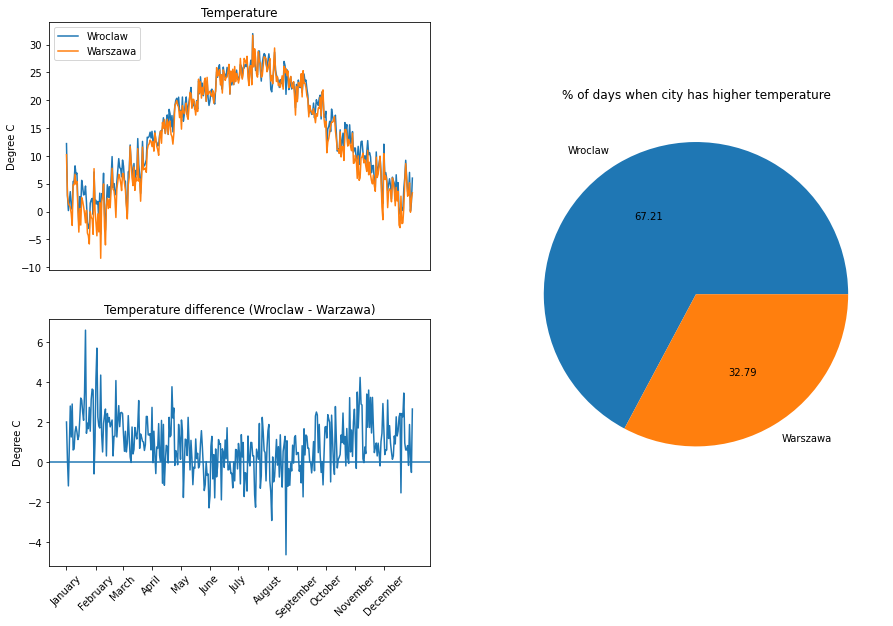

In [8]:
dates = pd.to_datetime(max_df['month-day'], format='%m-%d')

plt.figure(figsize=(15, 10))

# Top
plt.subplot(2, 2, 1)
plt.plot(dates, max_df['Data_Value_WRO', 'mean'], label='Wroclaw')
plt.plot(dates, max_df['Data_Value_WAR', 'mean'], label='Warszawa')
plt.title('Temperature')
plt.ylabel('Degree C')
plt.xticks([])
plt.legend(loc=2)

# Bottom
diff = max_df['Data_Value_WRO', 'mean'] - max_df['Data_Value_WAR', 'mean']
plt.subplot(2, 2, 3)
plt.plot(dates, diff)
plt.axhline(0)
plt.title('Temperature difference (Wroclaw - Warzawa)')
plt.xticks(pd.to_datetime(['01-01','02-01','03-01','04-01','05-01','06-01','07-01','08-01','09-01','10-01','11-01','12-01'], format='%m-%d'),
           ['January','February', 'March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
           rotation=45)
plt.ylabel('Degree C')

# Right
plt.subplot(2, 2, (2, 4))
max_by_day = df[df['Element'] == 'TMAX']
more_in_wro = max_by_day[max_by_day['Data_Value_WRO'] > max_by_day['Data_Value_WAR']]
perc_warmer = len(more_in_wro) / len(max_by_day)
plt.gca().set_aspect('equal')
plt.pie([perc_warmer, 1 - perc_warmer], labels=['Wroclaw', 'Warszawa'], autopct='%.2f')
plt.title('% of days when city has higher temperature')

plt.savefig('visualization.png')
plt.show()

### Discussion 

This visualization was concerned with answering the question of which city is warmer, Wroclaw or Warszawa (2005-2015). The data was taken from provided in-course datasets. Plotted the locations of measurement stations, the average temperature during the years by day, the average temperature difference during the years by day, and the percentage of days when the city has a warmer temperature.

The **Temperature** plot shows that weather has similar patterns in both cities. The **Temperature difference** plot shows that Wroclaw usually is warmer by 2 degrees than Warszawa, but in summer, Warszawa is warmer by 2 degrees. The **% of days when the city has a higher temperature** shows that for the 2005-2015 years, the max temperature during the day was higher in Wroclaw in 67.21% of the days.